In [ ]:
def score_report_bar():
    path=r"C:\Users\Inception\Desktop\LLM-based-QA-chatbot-builder\UI\score_report"
    import os
    import math
    dat=[]
    for x in os.listdir(path):
        wh=[]
        flag=0
        for x2 in x:
            if x2>='a' and x2<='z':
                flag=1
                wh.append(x2)
            elif flag==1:
                wh.append(" ")
        wh=''.join(wh)
        wh=wh.replace("model ans","")
        wh=wh.replace("finetuned","")
        wh=wh.replace("  "," ")
        wh=wh.replace("xlsx","")
        df_temp=pd.read_excel(os.path.join(path,x))
        rating=sum(df_temp["rating"])/len(df_temp)
        dat.append({
            "Model Name":wh,
            "Average Rating":rating
        })
    temp=pd.DataFrame(dat)
    return temp

In [ ]:
import gradio as gr
import pandas as pd

def bar_plot_fn():
    temp=score_report_bar()
    return gr.BarPlot(
            temp,
            x="Model Name",
            y="Average Rating",
            x_title="Model name",
            y_title="Average Rating",
            title="Simple Bar Plot with made up data",
            tooltip=["Model Name", "Average Rating"],
            y_lim=[1, 5],
            width=200,
            height=1000
        )
with gr.Blocks() as bar_plot:
    with gr.Row():
        btn=gr.Button("test")
    with gr.Row():
        plot = gr.BarPlot()
    btn.click(bar_plot_fn, None, outputs=plot)

bar_plot.launch()	

In [ ]:
def parse_data(link,num=None):    
    from bs4 import BeautifulSoup
    import requests
    import re
    from docx import Document       
    from langchain_community.document_loaders import WebBaseLoader
    s=set()
    import time
    start_time = time.time()
    duration = 5
    def get_links(url):
        response = requests.get(url)
        data = response.text
        soup = BeautifulSoup(data, 'lxml')

        links = []
        for link in soup.find_all('a'):
            link_url = link.get('href')
            if link_url is not None and link_url.startswith('http'):
                s.add(link_url)
                links.append(link_url)
        
        return links
    # def write_to_file(links):
    #     with open('data.txt', 'a') as f:
    #         f.writelines(links)
    def get_all_links(url):
            for link in get_links(url):
                if (time.time() - start_time) >= duration:
                    return
                get_all_links(link)

    def data_ret2(link):
        loader = WebBaseLoader(f"{link}")
        data = loader.load()
        return data[0].page_content
    # link = 'https://kuet.ac.bd'
    s.add(link)
    get_all_links(link)
    li=list(s)
    all_data=[]
    if num==None:
        num=len(li)
    for idx,x in enumerate(li):
        if idx==num:
            break
        try:
            print("Link: ",x)
            all_data.append(data_ret2(x))
        except:
            print("pass")
            continue
    all_data2 = re.sub(r'\n+', '\n\n', "\n".join(all_data))
    document = Document()
    document.add_paragraph(all_data2)
    document.save('docx_file.docx')

In [3]:
parse_data("https://kuet.ac.bd")

Link:  http://library.kuet.ac.bd/
Link:  http://kuet.portal.gov.bd/site/page/84728d9d-6059-41c4-940c-0f75eacf7d4c/Quarterly--semiannual-monitoring--evaluation-reports
Link:  https://kuet.ac.bd/index.php/welcome/shownews/943


In [ ]:
import os
os.getcwd()

In [ ]:
df_all=[]
for x in os.listdir("save_ques_ans"):
    path=os.path.join("save_ques_ans",x)
    df_all.append(pd.read_excel(path))
df=pd.concat(df_all,axis=0)

In [ ]:
df

In [ ]:

doc=[]
for x in s:
    print(x)
    doc.extend(data_ret2(x))
    

In [ ]:
doc

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
if model_name=="Mistral":
    path="models/full_KUET_LLM_mistral"
elif model_name=="Zepyhr":
    path="models/full_KUET_LLM_zepyhr"
elif model_name=="Llama2":
    path="models/full_KUET_LLM_llama" 
tokenizer = AutoTokenizer.from_pretrained(path)
model = AutoModelForCausalLM.from_pretrained(path,
                                                device_map='auto',
                                                torch_dtype=torch.float16,
                                                use_auth_token=True,
                                                load_in_8bit=True,
                                                #  load_in_4bit=True
                                                )
model.push_to_hub(repo_id=f"My_model_{model_name}",token=hf)
tokenizer.push_to_hub(repo_id=f"My_model_{model_name}",token=hf)

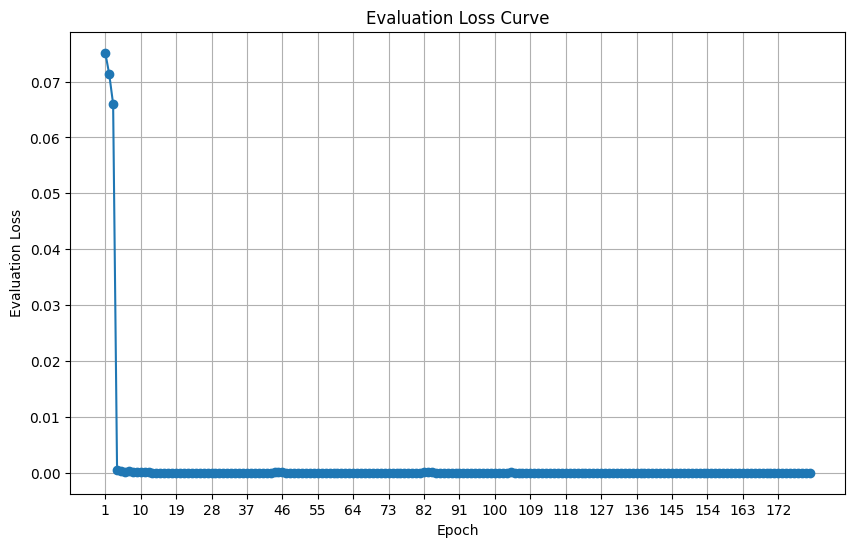

In [1]:
import matplotlib.pyplot as plt

# Merge all the evaluation loss lists
eval_loss_lists = [
    [
        0.07517127692699432,
        0.07137121260166168,
        0.06598775833845139,
        0.0005441228277049959,
        0.0002996980620082468,
        0.00021371280308812857,
        0.00028233605553396046,
        9.069988300325349e-05,
        7.004399230936542e-05,
        9.137028973782435e-05,
        5.340397547115572e-05,
        5.0301870942348614e-05
    ],
    [
        1.597152731847018e-05,
        1.162805529020261e-05,
        9.043936188390944e-06,
        1.379685454594437e-05,
        5.367660833144328e-06,
        4.6886875679774676e-06,
        4.490133960644016e-06,
        6.136821866675746e-06,
        3.3243470625166083e-06,
        2.348009729757905e-06,
        2.1804094103572425e-06,
        1.958705070137512e-06
    ],
    [
        3.93469099435606e-06,
        1.65619246672577e-06,
        1.1269650030953926e-06,
        8.881219173417776e-07,
        1.3077693665763945e-06,
        7.212336186057655e-07,
        6.988730092416517e-07,
        5.00343162457284e-07,
        4.1343139400851214e-07,
        5.06081335061026e-07,
        7.039822662591178e-07,
        5.087575800644117e-07
    ],
    [
        5.1233128033345565e-06,
        1.3323343637239304e-06,
        1.1789074960688595e-06,
        1.0221098136753426e-06,
        1.4271246300268103e-06,
        1.0917949566646712e-06,
        1.8720394336924073e-06,
        0.00015229727432597429,
        0.00016713247168809175,
        7.280236604856327e-05,
        5.6143608162528835e-06,
        1.2813707144232467e-06
    ],
    [
        1.7742066802384215e-06,
        3.1642618978366954e-06,
        2.774180939013604e-05,
        7.504659606638597e-06,
        1.0794157105920021e-06,
        8.346623303623346e-07,
        1.572396286064759e-06,
        4.874376031693828e-07,
        6.269995651564386e-07,
        5.949763703938515e-07,
        5.836409968651424e-07,
        5.382337917581026e-07
    ],
    [
        1.3506955838238355e-05,
        2.3305697141040582e-06,
        2.193627324231784e-06,
        3.027681714229402e-07,
        4.6904440864636854e-07,
        4.6231170358623785e-07,
        2.520739883493661e-07,
        2.040175957063184e-07,
        1.8624521658239246e-07,
        4.635896289073571e-07,
        2.6239982275910734e-07,
        2.4372931761718064e-07
    ],
    [
        5.271021564112743e-06,
        3.550181190803414e-06,
        2.5201459266099846e-06,
        2.8312820177234244e-06,
        1.4717104477313114e-06,
        2.2729768716089893e-06,
        1.030095177156909e-06,
        1.0983015954479924e-06,
        8.350090752173855e-07,
        4.235817687003873e-05,
        0.00017692078836262226,
        5.840817902935669e-05
    ],
    [
        1.2606010386662092e-06,
        7.131714937713696e-06,
        8.305702976940665e-06,
        6.520267561427318e-07,
        1.0400606953453462e-07,
        1.2373440938517888e-07,
        1.2282114880690642e-07,
        1.4778217405364558e-07,
        1.125305075788674e-07,
        4.522570762333089e-08,
        2.48692485911306e-05,
        5.199101238417825e-08
    ],
    [
        1.329818132944638e-06,
        9.433363743482914e-07,
        8.183121735783061e-07,
        1.0200094493484357e-06,
        7.936826023069443e-07,
        7.760887115182413e-07,
        2.45380675778506e-07,
        0.0001625938602956012,
        1.0732967581361663e-07,
        1.0528655138841714e-06,
        9.632424280425766e-07,
        7.961476740092621e-07
    ],
    [
        4.5500939904741244e-07,
        7.533798793701862e-07,
        4.7130234293035755e-07,
        7.465733347089554e-07,
        9.549980859446805e-07,
        6.432795771615929e-07,
        6.765155831089942e-07,
        6.765155831089942e-07,
        5.451398692457587e-07,
        4.994994355911331e-07,
        5.466189918479358e-07,
        4.268927682460344e-07
    ],
    [
        2.63293713942403e-07,
        3.551216138930613e-07,
        2.3628319922863739e-07,
        9.180489541904535e-07,
        1.1080908279836876e-06,
        6.248191084523569e-07,
        8.346111712853599e-07,
        5.276984325064404e-07,
        3.681239491015731e-07,
        1.8970614235058747e-07,
        3.114948299298703e-07,
        2.9696289516323304e-07
    ],
    # [
    #     2.38517332036281e-05,
    #     3.9089650272217114e-07,
    #     6.718229883517779e-08,
    #     1.4773820566915674e-07,
    #     5.8338137876035034e-08,
    #     3.57102081238736e-08,
    #     2.2298079329630127e-06,
    #     3.583775196602801e-07,
    #     9.418199908850511e-08,
    #     1.338206288892252e-06,
    #     3.194011810592201e-07,
    #     2.245769792352803e-07
    # ],
    [
        2.3522443370893598e-06,
        1.1711344996001571e-06,
        1.1321773172312533e-06,
        5.756968448622501e-07,
        4.4675923049908306e-07,
        4.365276993212319e-07,
        5.525398591998965e-07,
        4.404951710057503e-07,
        4.4630780848819995e-07,
        4.764913796861947e-07,
        4.10373701242861e-07,
        3.762708331578324e-07
    ],
    [
        2.1882451051169483e-07,
        5.146034354197582e-08,
        3.1587944704369875e-08,
        1.122993165125763e-08,
        8.033423704034703e-09,
        7.330823059703562e-09,
        2.0332389993882316e-08,
        1.718821529550496e-08,
        1.5028433608677005e-08,
        3.9828059072988253e-08,
        2.8266715190738978e-08,
        2.1497044144780375e-08
    ],
    [
        1.4871952558337398e-08,
        1.2490186662716951e-08,
        1.213749456496771e-08,
        1.159435214503901e-08,
        1.1296255486570317e-08,
        1.1153668211250078e-08,
        1.3103758966792611e-08,
        1.2461796927709656e-08,
        1.2030940688134706e-08,
        1.306745200935211e-08,
        1.029541429886649e-08,
        9.854548288501519e-09
    ]
]

# Flatten the nested list
merged_list = [item for sublist in eval_loss_lists for item in sublist]

# Number of epochs
epochs = 20

# Plotting the evaluation loss curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(merged_list) + 1), merged_list, marker='o')
plt.title('Evaluation Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Evaluation Loss')
plt.xticks(range(1, len(merged_list) + 1, len(merged_list) // epochs))
plt.grid(True)
plt.show()


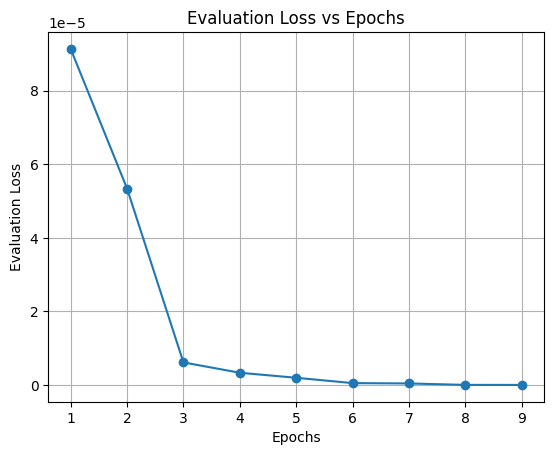

In [2]:
import matplotlib.pyplot as plt

# Given numbers
numbers = [
    9.069988300325349e-05,
    7.004399230936542e-05,
    9.137028973782435e-05,
    5.340397547115572e-05,
    5.0301870942348614e-05,
    9.043936188390944e-06,
    4.6886875679774676e-06,
    4.490133960644016e-06,
    6.136821866675746e-06,
    3.3243470625166083e-06,
    2.348009729757905e-06,
    2.1804094103572425e-06,
    1.958705070137512e-06,
    6.988730092416517e-07,
    5.00343162457284e-07,
    4.1343139400851214e-07,
    5.06081335061026e-07,
    7.039822662591178e-07,
    5.087575800644117e-07,
    2.0332389993882316e-08,
    1.718821529550496e-08,
    1.5028433608677005e-08,
    3.9828059072988253e-08,
    2.8266715190738978e-08,
    2.1497044144780375e-08,
    9.854548288501519e-09
]

# Sorting the numbers in descending order
numbers.sort(reverse=True)

# Selecting every 3rd number for plotting
selected_numbers = numbers[::3]

# Creating x-axis values (epochs)
epochs = list(range(1, len(selected_numbers) + 1))

# Plotting the curve
plt.plot(epochs, selected_numbers, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Evaluation Loss')
plt.title('Evaluation Loss vs Epochs')
plt.grid(True)
plt.show()


In [2]:
import gradio as gr
import time
def my_function(x, progress=gr.Progress()):
    progress(0, desc="Starting...")
    time.sleep(1)
    for i in progress.tqdm(range(100)):
        time.sleep(0.1)
    return x
with gr.Row():
    a=gr.Textbox()
    b=gr.TextArea("tt")
    btn=gr.Button("Test")
btn.click(my_function,a,b)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
